### Imports 

In [ ]:
# To get the history of ALL jupyter notebook lines that have ever been written by me --> Alexander is the best omg
%history -g -f backup

In [3]:
import pandas as pd
import os
import numpy as np

from matplotlib import image as mpimg
from matplotlib import pyplot as plt 

## Match background to GT data

In [ ]:
GT_df = pd.read_csv("/media1/data/beardata/GTs/2017_heads.csv")
background_df = pd.read_csv("/media1/data/beardata/background/2017_split/2017_backgrounds.csv")

names_GT = []
names_back = []
for i in range(len(GT_df)): 
    names_GT.append(os.path.basename(GT_df.image[i]))
    names_back.append(background_df.filenames[i])


print('GT length =', len(names_GT))

d = [value for value in names_back if value in names_GT]
print("Number of equal elements (filenames) =", len(d))


In [ ]:
# fast way!
GT_df["background"] = np.nan

for i in range(len(GT_df)):
    idx = background_df.filenames.to_list().index(os.path.basename(GT_df.image[i]))
    GT_df.background[i] = background_df.background[idx]


GT_df
#final = GT_df.drop("Unnamed: 0", axis=1)


In [ ]:
#GT_df.to_csv("/media1/data/beardata/GTs/2017_heads.csv")

#### Visualization

In [ ]:
columns = 6
rows = 10
_, axs = plt.subplots(rows, columns, figsize=(20, 20))
axs = axs.flatten()
for idx, ax in zip(range(60), axs):
    img = mpimg.imread(os.path.join("/media1/data/beardata", GT_df.image[idx+4000]), 200)
    ax.set_title(GT_df.background[idx+4000], fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
plt.show()

## Visualization of the backgrounds

In [ ]:
GT_df = pd.read_csv("/media1/data/beardata/GTs/2017_heads.csv")

examples = [GT_df.image[idx] for idx in range(len(GT_df)) if GT_df.background[idx] == "water" ]
print(len(examples))

columns = 6
rows = 7
_, axs = plt.subplots(rows, columns, figsize=(20, 20))
axs = axs.flatten()
for idx, ax in zip(range(42), axs):
    img = mpimg.imread(os.path.join("/media1/data/beardata", examples[idx+500]), 200)
    ax.set_title("water", fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
plt.show()

## Background analysis

### All data (with backgrounds)

In [4]:
df_2017 = pd.read_csv("/media1/data/beardata/GTs/2017_heads.csv")
df_2018 = pd.read_csv("/media1/data/beardata/GTs/2018_heads.csv")
df_2019 = pd.read_csv("/media1/data/beardata/GTs/2019_heads.csv")
df_2020 = pd.read_csv("/media1/data/beardata/GTs/2020_heads.csv")
df_2021 = pd.read_csv("/media1/data/beardata/GTs/2021_heads.csv")

In [5]:
backgrounds = ['grass', 'fall', 'water', 'stone']
years = ['2017', '2018', '2019', '2020', '2021']

### Proportion of bears per year

grass
fall
water
stone


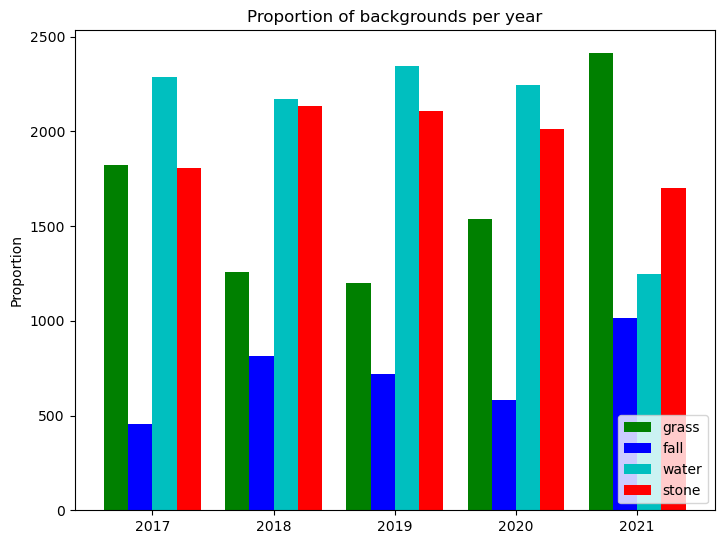

In [15]:
num_backgrounds = []
X = np.arange(5)

for background in backgrounds:
    print(background) 
    num_back_2017 = len(['hit' for i in range(len(df_2017)) if df_2017.background[i] == background])
    num_back_2018 = len(['hit' for i in range(len(df_2017)) if df_2018.background[i] == background])
    num_back_2019 = len(['hit' for i in range(len(df_2017)) if df_2019.background[i] == background])
    num_back_2020 = len(['hit' for i in range(len(df_2017)) if df_2020.background[i] == background])
    num_back_2021 = len(['hit' for i in range(len(df_2017)) if df_2021.background[i] == background])
    num_backgrounds.append([num_back_2017, num_back_2018, num_back_2019, num_back_2020, num_back_2021])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.3, num_backgrounds[0], color='g', width=0.2)
ax.bar(X - 0.1, num_backgrounds[1], color='b', width=0.2)
ax.bar(X + 0.1, num_backgrounds[2], color='c', width=0.2)
ax.bar(X + 0.3, num_backgrounds[3], color='r', width=0.2)

ax.set_xticks(X)
ax.set_xticklabels(years)

plt.legend(backgrounds, loc=4)
plt.ylabel('Proportion')
plt.title('Proportion of backgrounds per year')
plt.show()

### Number of unique bears throughout the years

In [16]:
print(f"In 2017, there were {len(np.unique(df_2017.id.to_list()))} different bears")
print(f"In 2018, there were {len(np.unique(df_2018.id.to_list()))} different bears")
print(f"In 2019, there were {len(np.unique(df_2019.id.to_list()))} different bears")
print(f"In 2020, there were {len(np.unique(df_2020.id.to_list()))} different bears")
print(f"In 2021, there were {len(np.unique(df_2021.id.to_list()))} different bears")

In 2017, there were 73 different bears
In 2018, there were 72 different bears
In 2019, there were 68 different bears
In 2020, there were 56 different bears
In 2021, there were 58 different bears


[73, 72, 68, 56, 58]


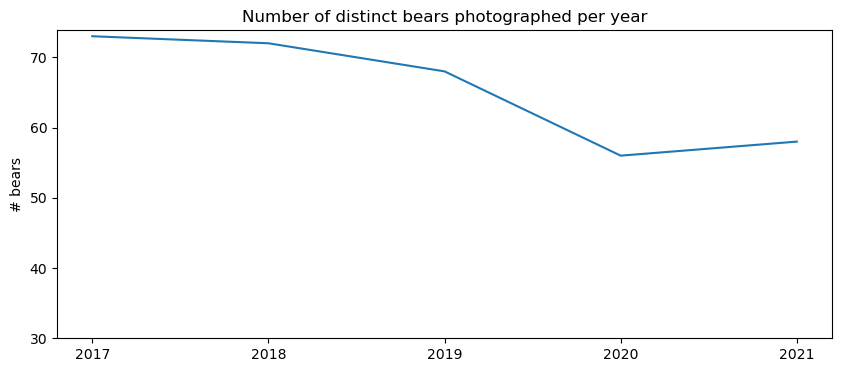

In [17]:
num_bears = [len(np.unique(df_2017.id.to_list())), len(np.unique(df_2018.id.to_list())), len(np.unique(df_2019.id.to_list())), 
             len(np.unique(df_2020.id.to_list())), len(np.unique(df_2021.id.to_list()))]
print(num_bears)
fig = plt.figure(figsize=(10,4))
plt.plot(X, num_bears)

yticks = np.arange(30, 80, 10)
plt.yticks(yticks)
plt.xticks(range(len(years)), years)
plt.ylabel('# bears')
plt.title('Number of distinct bears photographed per year')
plt.show()

In [ ]:
count_may = 0
count_june = 0
count_july = 0
count_aug = 0

gray = ['#F5F5F5', '#D3D3D3', '#A9A9A9', '#808080', '#696969', '#333333']
blue = ['#F0F8FF', '#ADD8E6', '#87CEEB', '#00BFFF', '#1E90FF', '#0000CD']
pale_green = '#98FB98'
light_green = '#00FF00'
lime_green = '#32CD32'
green = '#008000'
dark_green = '#006400'

shades_of_green = [pale_green, light_green, lime_green, green, dark_green]
shades_of_purple = ['#F5E1FF', '#E6B8FF', '#D7A2FF', '#C68CFF', '#B776FF']


violet = ['thistle', 'mediumpurple', 'slateblue', 'darkorchid', 'rebeccapurple']
green = ['palegreen', 'lightgreen', 'limegreen', 'green', 'darkgreen' ]
gray = ['gainsboro', 'silver', 'darkgray', 'gray', 'dimgrey']
blue = ['skyblue', 'lightblue', 'steelblue', 'deepkyblue', 'dodgerblue']

colors = [violet, green, gray, blue]

plt.figure()

for i, background in enumerate(['fall', 'grass', 'stone', 'water']): 
    color = colors[i]
    print(type(color))
    

    for idx, row in new.iterrows():
        if idx[1] == '2017':
            icolor = 0
        if idx[1] == '2018':
            icolor = 1
        if idx[1] == '2019':
            icolor = 2
        if idx[1] == '2020':
            icolor = 3
        if idx[1] == '2021':
            icolor = 4

        if np.isnan(row[background]): 
            back = 0
        else: 
            back = row[background]        
            
        if idx[0] == 'May':
            plt.bar(idx[0], back, bottom=count_may, color=color[icolor], label=background)
            count_may += back

        if idx[0] == 'June':
            plt.bar(idx[0], back, bottom=count_june, color=color[icolor], label=background)
            count_june += back

        if idx[0] == 'July':
            plt.bar(idx[0], back, bottom=count_july, color=color[icolor], label=background)
            count_july += back

        if idx[0] == 'August':
            plt.bar(idx[0], back, bottom=count_aug, color=color[icolor], label=background)
            count_aug += back

plt.legend()
plt.show()